In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN'],1)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# check the shape
application_df.shape

(34299, 11)

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [ ]:
# examine value counts for STATUS
#application_df["STATUS"].value_counts()

In [ ]:
# examine value counts for SPECIAL_CONSIDERATIONS
#application_df["SPECIAL_CONSIDERATIONS"].value_counts()

In [ ]:
# Drop the additional non-beneficial columns STATUS and SPECIAL_CONSIDERATIONS
#application_df = application_df.drop(['STATUS', 'SPECIAL_CONSIDERATIONS'], 1)


In [8]:
#Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()


In [10]:
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
#Determine which values to replace if counts are less than 500
replace_application = list(application_counts[application_counts < 500].index)

#replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app,"Other")
    
#check to make sure binning worked
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C1236        1
C1245        1
C2600        1
C1248        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [13]:
class_counts < 1000

C1000    False
C2000    False
C1200    False
C3000    False
C2100    False
         ...  
C2500     True
C1236     True
C1245     True
C2600     True
C1248     True
Name: CLASSIFICATION, Length: 71, dtype: bool

In [14]:
#Determine which values to replace if counts are less than 500
replace_class = list(class_counts[class_counts < 1000].index)

#replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls,"Other")
    
#check to make sure binning worked
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [15]:
# Determine number of unique values in each column
application_df.nunique()

NAME                      19568
APPLICATION_TYPE              9
AFFILIATION                   6
CLASSIFICATION                6
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [16]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [20]:
# BIN NAMES
#
#

In [21]:
# look at NAME value counts for binning
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
WATER IN THE DESERT INC                               1
THE JONATHAN FOUNDATION INC                           1
DREAM BUILDING INC                                    1
ART WITHIN INC                                        1
THE MARSH A BREEDING GROUND FOR NEW PERFORMANCE       1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

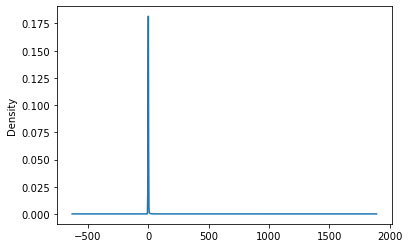

In [22]:
# visualize the value counts of NAME
name_counts.plot.density()

In [24]:
# how many name counts are there with only 1?
name_counts[name_counts <= 1]

NATIONAL PRIVATE EDUCATORS AND AFFILIATES ASSOC HEALTH & WELFARE    1
CREATING HEALTHY EQUINES TO SERVICE THERAPEUTIC RIDING              1
MINDSEA FOUNDATION                                                  1
ROTHE MINISTRIES                                                    1
CARMEL COMMUNITY INC                                                1
                                                                   ..
WATER IN THE DESERT INC                                             1
THE JONATHAN FOUNDATION INC                                         1
DREAM BUILDING INC                                                  1
ART WITHIN INC                                                      1
THE MARSH A BREEDING GROUND FOR NEW PERFORMANCE                     1
Name: NAME, Length: 18776, dtype: int64

In [25]:
# how many name counts are there less than 5
name_counts[name_counts <=5]

FATHER FLANAGANS BOYS HOME                         5
RISK MANAGEMENT ASSOCIATES FLORIDA CHAPTER CORP    5
KAPPA ALPHA PSI FRATERNITY                         5
LEAGUE OF UNITED LATIN AMERICAN CITIZENS           5
ACTS MINISTRY                                      5
                                                  ..
WATER IN THE DESERT INC                            1
THE JONATHAN FOUNDATION INC                        1
DREAM BUILDING INC                                 1
ART WITHIN INC                                     1
THE MARSH A BREEDING GROUND FOR NEW PERFORMANCE    1
Name: NAME, Length: 19214, dtype: int64

In [26]:
# how many name_counts are there less than 100 and greater than 5
name_counts[((name_counts <= 100) & (name_counts > 5))]

AIR FORCE ASSOCIATION                                      99
WORKERS UNITED                                             97
GAMMA THETA UPSILON                                        92
INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS                 91
SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES    87
                                                           ..
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS                6
WASHINGTON SOCIETY OF PROFESSIONAL ENGINEERS                6
AMERICAN SOCIETY OF ADDICTION MEDICINE INC                  6
HANDS FOR LIFE                                              6
KIWANIS INTERNATIONAL                                       6
Name: NAME, Length: 324, dtype: int64

In [27]:
# how many name_counts are there greater than 100
len(name_counts[name_counts > 100])

30

In [35]:
#use bucket technique to put those with more than 5 but less than 100 in a bucket
#use bucket technique to put 5or less ina small bucket
#determine which values to replace if counts are less than or equal to 5

replace_application = list(name_counts[name_counts <= 1].index)

# replace in dataframe
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"No_repeat")
    
# check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat                                                             18776
Habitual                                                               5944
Infrequent                                                             1267
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGU

In [36]:
# use bucket technique to put those with 5 or less in a small bucket
# determine which values to replace is counts are less than or equal to 5
replace_application = list(name_counts[name_counts <= 5].index)

# replace in dataframe
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"Infrequent")
    
# cehck to make sure binning was successful
application_df.NAME.value_counts()

No_repeat                                                             18776
Habitual                                                               5944
Infrequent                                                             1267
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGU

In [38]:
#use bucket technique to put those with more than 5 but less than 100 in a bucket
#use bucket technique to put 5or less ina small bucket
#determine which values to replace if counts are less than or equal to 5

replace_application = list(name_counts[name_counts <= 100].index)

# replace in dataframe
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"Frequent")
    
# check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat                                                             18776
Habitual                                                               5944
Infrequent                                                             1267
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGU

In [40]:
#use bucket technique to put those with more than 100 in a bucket
replace_application = list(name_counts[name_counts > 100].index)

# replace in dataframe
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"Habitual")
    
# cehck to make sure binning was successful
application_df.NAME.value_counts()

No_repeat     18776
Habitual      14256
Infrequent     1267
Name: NAME, dtype: int64

In [41]:
# testing
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [42]:
# testing
[application_df.dtypes == "object"]

[NAME                       True
 APPLICATION_TYPE           True
 AFFILIATION                True
 CLASSIFICATION             True
 USE_CASE                   True
 ORGANIZATION               True
 STATUS                    False
 INCOME_AMT                 True
 SPECIAL_CONSIDERATIONS     True
 ASK_AMT                   False
 IS_SUCCESSFUL             False
 dtype: bool]

In [43]:
# testing 
application_df.dtypes[application_df.dtypes == "object"].index.tolist()

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [44]:
# generate categorical variable lists (19.4.2)
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
# Create a OneHotEncoder instance

#fit and transform the OneHotEncoder using the categorical variable list

# add the encoded variable names to DataFrame



In [45]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_Habitual,NAME_Infrequent,NAME_No_repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
#merge one-hot encoded feautures and drop originals


In [47]:
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_Habitual,NAME_Infrequent,NAME_No_repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
application_df.shape

(34299, 47)

In [49]:
# check if all are numeric 
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   NAME_Habitual                 34299 non-null  float64
 4   NAME_Infrequent               34299 non-null  float64
 5   NAME_No_repeat                34299 non-null  float64
 6   APPLICATION_TYPE_Other        34299 non-null  float64
 7   APPLICATION_TYPE_T10          34299 non-null  float64
 8   APPLICATION_TYPE_T19          34299 non-null  float64
 9   APPLICATION_TYPE_T3           34299 non-null  float64
 10  APPLICATION_TYPE_T4           34299 non-null  float64
 11  APPLICATION_TYPE_T5           34299 non-null  float64
 12  APPLICATION_TYPE_T6           34299 non-null  float64
 13  A

In [ ]:
# split the preprocessed data into our features and target arrays

# split the processed data into training and testing

In [50]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop('IS_SUCCESSFUL',1).values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=78, stratify=y)

In [51]:
X_train[:1]

array([[1.e+00, 5.e+03, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00,
        1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 1.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00]])

In [ ]:
# create a StandardScaler instances

# fit the StandardScaler

#Scale the data

In [52]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [53]:
# testing
len(X_train[0])

46

In [ ]:
# complile the model


In [54]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1
hidden_nodes_layer4 = 20


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features,activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation='relu'))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation='relu'))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4,activation='relu'))

#Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 138)               6486      
                                                                 
 dense_1 (Dense)             (None, 92)                12788     
                                                                 
 dense_2 (Dense)             (None, 46)                4278      
                                                                 
 dense_3 (Dense)             (None, 20)                940       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 24,513
Trainable params: 24,513
Non-trainable params: 0
_________________________________________________________________


In [55]:
# implement checkpopints
####

import os
from tensorflow.keras.callbacks import ModelCheckpoint

# define checkpoint from path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5)"

In [56]:
#Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
#create a callback that saves models weights every epcoh

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [58]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 768us/step - loss: 0.5628 - accuracy: 0.7246
Epoch 2/100
804/804 [==============================] - 1s 754us/step - loss: 0.5483 - accuracy: 0.7331
Epoch 3/100
804/804 [==============================] - 1s 751us/step - loss: 0.5460 - accuracy: 0.7351
Epoch 4/100
804/804 [==============================] - 1s 744us/step - loss: 0.5433 - accuracy: 0.7346
Epoch 5/100
804/804 [==============================] - 1s 749us/step - loss: 0.5413 - accuracy: 0.7366
Epoch 6/100
804/804 [==============================] - 1s 747us/step - loss: 0.5401 - accuracy: 0.7379
Epoch 7/100
804/804 [==============================] - 1s 747us/step - loss: 0.5385 - accuracy: 0.7380
Epoch 8/100
804/804 [==============================] - 1s 765us/step - loss: 0.5379 - accuracy: 0.7402
Epoch 9/100
804/804 [==============================] - 1s 754us/step - loss: 0.5361 - accuracy: 0.7411
Epoch 10/100
804/804 [==============================] - 1s 749us/step - l

804/804 [==============================] - 1s 738us/step - loss: 0.5188 - accuracy: 0.7495
Epoch 80/100
804/804 [==============================] - 1s 734us/step - loss: 0.5221 - accuracy: 0.7511
Epoch 81/100
804/804 [==============================] - 1s 734us/step - loss: 0.5175 - accuracy: 0.7497
Epoch 82/100
804/804 [==============================] - 1s 735us/step - loss: 0.5167 - accuracy: 0.7505
Epoch 83/100
804/804 [==============================] - 1s 737us/step - loss: 0.5161 - accuracy: 0.7514
Epoch 84/100
804/804 [==============================] - 1s 739us/step - loss: 0.5168 - accuracy: 0.7506
Epoch 85/100
804/804 [==============================] - 1s 745us/step - loss: 0.5167 - accuracy: 0.7507
Epoch 86/100
804/804 [==============================] - 1s 749us/step - loss: 0.5168 - accuracy: 0.7505
Epoch 87/100
804/804 [==============================] - 1s 748us/step - loss: 0.5176 - accuracy: 0.7496
Epoch 88/100
804/804 [==============================] - 1s 742us/step - loss:

In [61]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5882 - accuracy: 0.7324 - 123ms/epoch - 459us/step
Loss: 0.5881860852241516, Accuracy: 0.7323614954948425


In [63]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization2.h5')